In [5]:
import json

def load_captions(filepath):
    captions = {}
    cap_list = []
    with open(filepath, 'r') as fin:
        cap_list = json.load(fin)
    for cap in cap_list:
        captions[cap['image_id']] = cap['caption']
    return captions

captions = []
beam_widths = ['1','3','5','10']
for i in beam_widths:
    captions.append(load_captions('./results/predictions_beam_width_'+str(i)+'.json'))

keys = list(captions[0].keys())


loading annotations into memory...
Done (t=0.24s)
creating index...
index created!




Example: 1
Ground truth:
a kite with a long tail some people and a black truck
A large kite flying over a desert-like setting.
The people fly the kite and other people sit and watch.
A car flying a kite in the dessert with moutains in the background.
A large kite is being flown in a cloudy sky.


Caption (beam_width = 1): <start> a man flying a kite on a beach . <end>
Caption (beam_width = 3): <start> a man flying a kite on top of a sandy beach . <end>
Caption (beam_width = 5): <start> a man flying a kite on top of a sandy beach . <end>
Caption (beam_width = 10): <start> a man flying a kite on top of a sandy beach . <end>


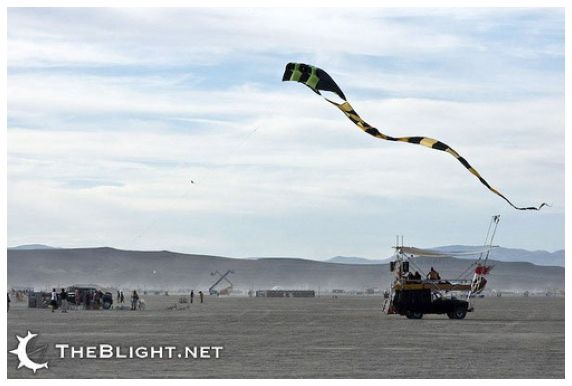


Example: 2
Ground truth:
A black cat is sitting on a suitcase looking up.
A black cat laying on top of a suitcase.
A black cat sitting on someones black luggage.
A cat sits on top of a travel bag. 
A black cat looking up while lying on a suitcase.


Caption (beam_width = 1): <start> a cat sitting on top of a suitcase . <end>
Caption (beam_width = 3): <start> a black cat sitting on top of a suitcase . <end>
Caption (beam_width = 5): <start> a black cat sitting on top of a suitcase . <end>
Caption (beam_width = 10): <start> a black cat sitting on top of a suitcase . <end>


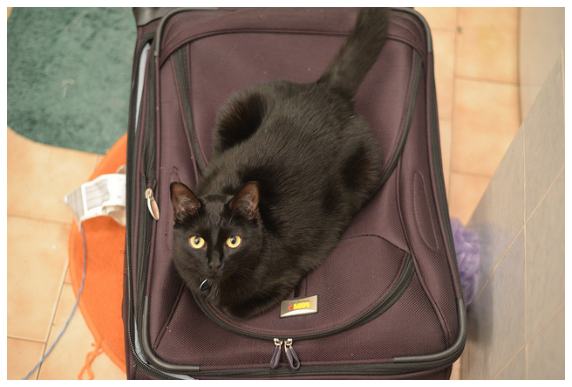


Example: 3
Ground truth:
A teacher shows the students their new assignment.
A woman sitting at a desk in front of three kids.
A man sits at a desk drawing as children watch.
A teacher is surrounded by three asian students. 
A woman sitting in a desk with children surrounding her.


Caption (beam_width = 1): <start> a group of people sitting around a table with a cake . <end>
Caption (beam_width = 3): <start> a group of people sitting around a table with a cake . <end>
Caption (beam_width = 5): <start> a group of people standing around a table with a cake . <end>
Caption (beam_width = 10): <start> a group of people that are sitting around a table . <end>


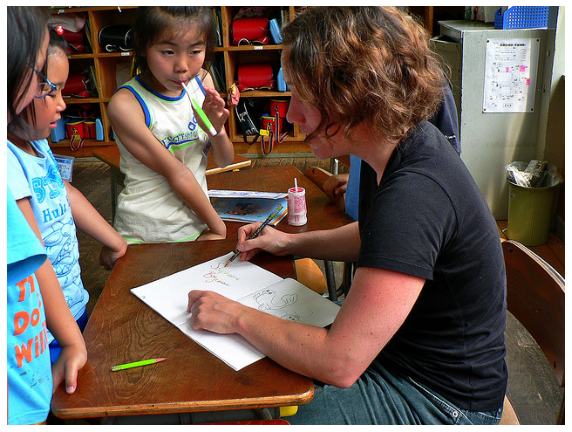


Example: 4
Ground truth:
A skier barrels down a slope while kicking up snow.
a person skis down a mountain with white snow.
Person with back pack skiing in the powdered snow.
The skier kicks up snow as he moves down the slope.
A person skis down a snowy hill. 


Caption (beam_width = 1): <start> a person on skis going down a snowy hill . <end>
Caption (beam_width = 3): <start> a man riding skis down a snow covered slope . <end>
Caption (beam_width = 5): <start> a man riding skis down a snow covered slope . <end>
Caption (beam_width = 10): <start> a man riding a snowboard down the side of a snow covered slope . <end>


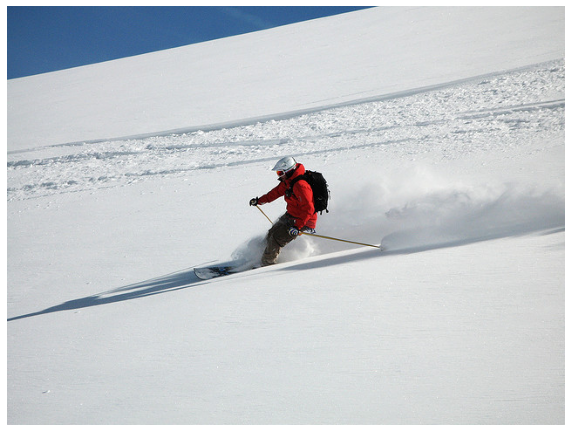


Example: 5
Ground truth:
Black and white dog sitting on a futon near a TV.
A dog sits on the futon in a small living room
A television and a dog on a couch in a room.
A small living room has a futon sofa.
A dog sitting on a coach in a living room. 


Caption (beam_width = 1): <start> a living room with a couch , chair , and a television . <end>
Caption (beam_width = 3): <start> a living room with a couch a table and a tv <end>
Caption (beam_width = 5): <start> a living room filled with furniture and a flat screen tv . <end>
Caption (beam_width = 10): <start> a living room filled with furniture and a flat screen tv . <end>


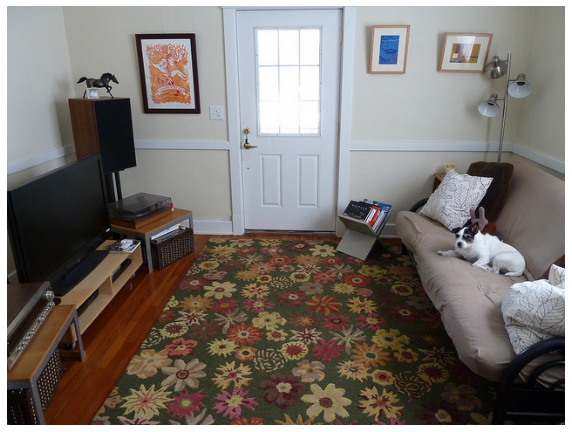

In [16]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
import glob
import sys
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

sys.path.append('../coco-caption')
from pycocotools.coco import COCO
annFile='./data/annotations/captions_val2014.json'
coco = COCO(annFile)
print('\n\n')

np.random.shuffle(keys)
samples = keys[:5]
cnt = 0
for img in samples:
    annIds = coco.getAnnIds(imgIds=img)
    anns = coco.loadAnns(annIds)
    cnt += 1
    print(f'\nExample: {cnt}')
    print('Ground truth:')
    coco.showAnns(anns)
    plt.figure()
    filepath = glob.glob(f'./data/val2014/*{img}*')[0]
    I = io.imread(filepath)
    print('\n')
    for i in range(len(beam_widths)):
        print(f'Caption (beam_width = {beam_widths[i]}): {captions[i][img]}')

    plt.imshow(I)
    plt.axis('off')
    plt.show()

